# Imports, loading data and EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import time

In [2]:
!git clone https://github.com/slatkowski/autos_project
df = pd.read_csv('autos_project/autos.csv')

fatal: destination path 'autos_project' already exists and is not an empty directory.


In [3]:
df

index          dateCrawled  \
0            0  2016-03-24 11:52:17   
1            1  2016-03-24 10:58:45   
2            2  2016-03-14 12:52:21   
3            3  2016-03-17 16:54:04   
4            4  2016-03-31 17:25:20   
...        ...                  ...   
371523  371523  2016-03-14 17:48:27   
371524  371524  2016-03-05 19:56:21   
371525  371525  2016-03-19 18:57:12   
371526  371526  2016-03-20 19:41:08   
371527  371527  2016-03-07 19:39:19   

                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                              ...     ...       ...    ...   
371523                    Suche_t4___vito_ab_6_sitze  privat   Angebot   2200   
371524         Smart_smart_leistungssteigerung_100ps  privat   Angebot   1199   
371525            Volkswagen_Multivan_T4_TDI_7DC_UY2  privat   Angebot   9200   
371526                        VW_Golf_Kombi_1_9l_TDI  privat   Angebot   3400   
371527  BMW_M135i_vollausgestattet_NP_52.720____Euro  privat   Angebot  28990   

         abtest vehicleType  yearOfRegistration    gearbox  ...        model  \
0          test         NaN                1993    manuell  ...         golf   
1          test       coupe                2011    manuell  ...          NaN   
2          test         suv                2004  automatik  ...        grand   
3          test  kleinwagen                2001    manuell  ...         golf   
4          test  kleinwagen                2008    manuell  ...        fabia   
...         ...         ...                 ...        ...  ...          ...   
371523     test         NaN                2005        NaN  ...          NaN   
371524     test      cabrio                2000  automatik  ...       fortwo   
371525     test         bus                1996    manuell  ...  transporter   
371526     test       kombi                2002    manuell  ...         golf   
371527  control   limousine                2013    manuell  ...      m_reihe   

       kilometer  monthOfRegistration  fuelType           brand  \
0         150000                    0    benzin      volkswagen   
1         125000                    5    diesel            audi   
2         125000                    8    diesel            jeep   
3         150000                    6    benzin      volkswagen   
4          90000                    7    diesel           skoda   
...          ...                  ...       ...             ...   
371523     20000                    1       NaN  sonstige_autos   
371524    125000                    3    benzin           smart   
371525    150000                    3    diesel      volkswagen   
371526    150000                    6    diesel      volkswagen   
371527     50000                    8    benzin             bmw   

       notRepairedDamage          dateCreated nrOfPictures  postalCode  \
0                    NaN  2016-03-24 00:00:00            0       70435   
1                     ja  2016-03-24 00:00:00            0       66954   
2                    NaN  2016-03-14 00:00:00            0       90480   
3                   nein  2016-03-17 00:00:00            0       91074   
4                   nein  2016-03-31 00:00:00            0       60437   
...                  ...                  ...          ...         ...   
371523               NaN  2016-03-14 00:00:00            0       39576   
371524              nein  2016-03-05 00:00:00            0       26135   
371525              nein  2016-03-19 00:00:00            0       87439   
371526               NaN  2016-03-20 00:00:00            0   

In [4]:
df['index'].is_unique

True

In [5]:
df.set_index('index', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [7]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [8]:
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

price yearOfRegistration    powerPS  kilometer  \
count      371528.00          371528.00  371528.00  371528.00   
mean        17295.14            2004.58     115.55  125618.69   
std       3587953.74              92.87     192.14   40112.34   
min             0.00            1000.00       0.00    5000.00   
25%          1150.00            1999.00      70.00  125000.00   
50%          2950.00            2003.00     105.00  150000.00   
75%          7200.00            2008.00     150.00  150000.00   
max    2147483647.00            9999.00   20000.00  150000.00   

      monthOfRegistration nrOfPictures postalCode  
count           371528.00    371528.00  371528.00  
mean                 5.73         0.00   50820.67  
std                  3.71         0.00   25799.08  
min                  0.00         0.00    1067.00  
25%                  3.00         0.00   30459.00  
50%                  6.00         0.00   49610.00  
75%                  9.00         0.00   71546.00  
max                 12.00         0.00   99998.00

In [9]:
df.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [10]:
df = df.loc[(df.brand == 'volkswagen') | (df.brand == 'bmw') | (df.brand == 'mercedes_benz') | (df.brand == 'opel') | (df.brand == 'audi')]

In [11]:
df = df[(df['yearOfRegistration'] > 1979) & (df['yearOfRegistration'] < 2023)]
df = df[(df['price'] > 499) & (df['price'] < 50000)]
df = df[(df['powerPS'] > 49) & (df['powerPS'] < 500)]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188216 entries, 1 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          188216 non-null  object
 1   name                 188216 non-null  object
 2   seller               188216 non-null  object
 3   offerType            188216 non-null  object
 4   price                188216 non-null  int64 
 5   abtest               188216 non-null  object
 6   vehicleType          176623 non-null  object
 7   yearOfRegistration   188216 non-null  int64 
 8   gearbox              185508 non-null  object
 9   powerPS              188216 non-null  int64 
 10  model                182542 non-null  object
 11  kilometer            188216 non-null  int64 
 12  monthOfRegistration  188216 non-null  int64 
 13  fuelType             177816 non-null  object
 14  brand                188216 non-null  object
 15  notRepairedDamage    162024 non-nu

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148661 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          148661 non-null  object
 1   name                 148661 non-null  object
 2   seller               148661 non-null  object
 3   offerType            148661 non-null  object
 4   price                148661 non-null  int64 
 5   abtest               148661 non-null  object
 6   vehicleType          148661 non-null  object
 7   yearOfRegistration   148661 non-null  int64 
 8   gearbox              148661 non-null  object
 9   powerPS              148661 non-null  int64 
 10  model                148661 non-null  object
 11  kilometer            148661 non-null  int64 
 12  monthOfRegistration  148661 non-null  int64 
 13  fuelType             148661 non-null  object
 14  brand                148661 non-null  object
 15  notRepairedDamage    148661 non-nu

In [15]:
bins = [0, 16999, 28999, 39999, 69999, 89999]

df['postalCode'] = pd.cut(df['postalCode'], bins=bins,
       labels=['Eastern', 'Northern', 'Central', 'Western', 'Southern'])

df['postalCode']

index
3              NaN
5          Central
11         Western
19         Western
20        Southern
            ...   
371512         NaN
371516     Western
371517    Southern
371525    Southern
371527    Southern
Name: postalCode, Length: 148661, dtype: category
Categories (5, object): ['Eastern' < 'Northern' < 'Central' < 'Western' < 'Southern']

In [16]:
df['postalCode'].fillna('Central', inplace=True)
df['postalCode']

index
3          Central
5          Central
11         Western
19         Western
20        Southern
            ...   
371512     Central
371516     Western
371517    Southern
371525    Southern
371527    Southern
Name: postalCode, Length: 148661, dtype: category
Categories (5, object): ['Eastern' < 'Northern' < 'Central' < 'Western' < 'Southern']

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [18]:
encode_list = ['gearbox', 'vehicleType', 'notRepairedDamage', 'fuelType', 'postalCode']

In [19]:
for i in encode_list:
    df[i] = le.fit_transform(df[i])
    print(df[i].name)
    print(le.classes_)
    print(np.unique(df[i]))
    print('__________')

gearbox
['automatik' 'manuell']
[0 1]
__________
vehicleType
['andere' 'bus' 'cabrio' 'coupe' 'kleinwagen' 'kombi' 'limousine' 'suv']
[0 1 2 3 4 5 6 7]
__________
notRepairedDamage
['ja' 'nein']
[0 1]
__________
fuelType
['andere' 'benzin' 'cng' 'diesel' 'elektro' 'hybrid' 'lpg']
[0 1 2 3 4 5 6]
__________
postalCode
['Central' 'Eastern' 'Northern' 'Southern' 'Western']
[0 1 2 3 4]
__________


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148661 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          148661 non-null  object
 1   name                 148661 non-null  object
 2   seller               148661 non-null  object
 3   offerType            148661 non-null  object
 4   price                148661 non-null  int64 
 5   abtest               148661 non-null  object
 6   vehicleType          148661 non-null  int32 
 7   yearOfRegistration   148661 non-null  int64 
 8   gearbox              148661 non-null  int32 
 9   powerPS              148661 non-null  int64 
 10  model                148661 non-null  object
 11  kilometer            148661 non-null  int64 
 12  monthOfRegistration  148661 non-null  int64 
 13  fuelType             148661 non-null  int32 
 14  brand                148661 non-null  object
 15  notRepairedDamage    148661 non-nu

In [21]:
df['brand'].value_counts()

volkswagen       49324
bmw              28718
mercedes_benz    24835
audi             23432
opel             22352
Name: brand, dtype: int64

In [22]:
min_cnt = df['brand'].value_counts().min()
df = df.groupby('brand').sample(min_cnt)

In [23]:
df['brand'].value_counts()

audi             22352
bmw              22352
mercedes_benz    22352
opel             22352
volkswagen       22352
Name: brand, dtype: int64

In [24]:
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

price vehicleType yearOfRegistration    gearbox    powerPS  \
count  111760.00   111760.00          111760.00  111760.00  111760.00   
mean     7687.20        4.60            2003.57       0.69     145.39   
std      7731.25        1.67               5.83       0.46      60.75   
min       500.00        0.00            1980.00       0.00      50.00   
25%      2049.75        4.00            2000.00       0.00     102.00   
50%      4999.00        5.00            2004.00       1.00     140.00   
75%     10500.00        6.00            2008.00       1.00     175.00   
max     49999.00        7.00            2018.00       1.00     490.00   

       kilometer monthOfRegistration   fuelType notRepairedDamage  \
count  111760.00           111760.00  111760.00         111760.00   
mean   128136.90                6.30       1.88              0.92   
std     37391.97                3.44       1.10              0.27   
min      5000.00                0.00       0.00              0.00   
25%    125000.00                3.00       1.00              1.00   
50%    150000.00                6.00       1.00              1.00   
75%    150000.00                9.00       3.00              1.00   
max    150000.00               12.00       6.00              1.00   

      nrOfPictures postalCode  
count    111760.00  111760.00  
mean          0.00       2.41  
std           0.00       1.56  
min           0.00       0.00  
25%           0.00       1.00  
50%           0.00       3.00  
75%           0.00       4.00  
max           0.00       4.00

In [25]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [26]:
df.drop(columns=['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'model', 'monthOfRegistration',
       'dateCreated', 'nrOfPictures', 'lastSeen'], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111760 entries, 137172 to 7665
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               111760 non-null  int64 
 1   vehicleType         111760 non-null  int32 
 2   yearOfRegistration  111760 non-null  int64 
 3   gearbox             111760 non-null  int32 
 4   powerPS             111760 non-null  int64 
 5   kilometer           111760 non-null  int64 
 6   fuelType            111760 non-null  int32 
 7   brand               111760 non-null  object
 8   notRepairedDamage   111760 non-null  int32 
 9   postalCode          111760 non-null  int32 
dtypes: int32(5), int64(4), object(1)
memory usage: 7.2+ MB


In [28]:
report = ProfileReport(df, infer_dtypes=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
pivot = pd.pivot_table(df, index='brand', values = ['price', 'vehicleType', 'yearOfRegistration',
                                                      'gearbox', 'powerPS', 'fuelType',
                                                      'notRepairedDamage', 'kilometer', 'postalCode'], 
                       aggfunc= [np.mean, np.median, np.std])
pd.options.display.max_columns = None
display(pivot)

mean                                                        \
               fuelType   gearbox      kilometer notRepairedDamage postalCode   
brand                                                                           
audi           2.065721  0.642180  127341.848604          0.917949   2.310666   
bmw            1.919157  0.638466  131951.726915          0.924213   2.484699   
mercedes_benz  2.003937  0.415131  130044.962419          0.923676   2.502326   
opel           1.530870  0.890972  125650.501074          0.900814   2.524741   
volkswagen     1.864800  0.842743  125695.463493          0.921349   2.231478   

                                                                        \
                  powerPS         price vehicleType yearOfRegistration   
brand                                                                    
audi           167.496600  10073.616813    4.990918        2004.594757   
bmw            175.765972   9173.571000    5.000403        2003.608312   
mercedes_benz  166.676807   8885.538117    4.618334        2002.813082   
opel           105.691840   3808.979420    4.137795        2003.280378   
volkswagen     111.330798   6494.275904    4.248792        2003.533107   

                median                                                         \
              fuelType gearbox kilometer notRepairedDamage postalCode powerPS   
brand                                                                           
audi                 3       1    150000                 1          3     160   
bmw                  1       1    150000                 1          3     170   
mercedes_benz        1       0    150000                 1          3     156   
opel                 1       1    150000                 1          3     101   
volkswagen           1       1    150000                 1          3     105   

                                                           std            \
                price vehicleType yearOfRegistration  fuelType   gearbox   
brand                                                                      
audi           7500.0           5               2005  1.101702  0.479370   
bmw            6995.0           6               2004  1.130849  0.480455   
mercedes_benz  5992.5           5               2003  1.157145  0.492756   
opel           2450.0           4               2003  1.009655  0.311682   
volkswagen     4250.0           5               2004  1.038807  0.364051   

                                                                     \
                  kilometer notRepairedDamage postalCode    powerPS   
brand                                                                 
audi           39207.218511          0.274448   1.571563  58.695457   
bmw            34024.746377          0.264664   1.553957  54.761036   
mercedes_benz  35667.215072          0.265522   1.522561  61.841162   
opel           37830.547984          0.298918   1.567138  38.668663   
volkswagen     39520.703454          0.269199   1.584938  45.682431   

                                                           
                     price vehicleType yearOfRegistration  
brand                                                      
audi           8948.358391    1.224611           5.834018  
bmw            8110.053610    1.469311           5.621842  
mercedes_benz  8348.010915    1.837244           6.199959  
opel           3898.345983    1.682556           5.140398  
volkswagen     6506.503724    1.870888           6.165435

**Modelowanie.**

In [30]:
X = df.drop(columns='brand')
y = df['brand']

In [31]:
X.sample(5)

price  vehicleType  yearOfRegistration  gearbox  powerPS  kilometer  \
df_index                                                                        
253140     4200            6                1999        0      310     150000   
219826    27990            7                2011        0      231     125000   
79005     16950            5                2010        0      204     125000   
143991     6500            2                2001        1      170     150000   
188231    19999            3                2009        0      272     125000   

          fuelType  notRepairedDamage  postalCode  
df_index                                           
253140           1                  1           3  
219826           3                  1           4  
79005            3                  1           0  
143991           1                  1           2  
188231           1                  1           1

In [32]:
y.sample(5)

df_index
190450           bmw
262882          audi
265575          opel
348604          audi
318724    volkswagen
Name: brand, dtype: object

In [33]:
brands = list(np.unique(y))
brands

['audi', 'bmw', 'mercedes_benz', 'opel', 'volkswagen']

In [34]:
X.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'kilometer', 'fuelType', 'notRepairedDamage', 'postalCode'],
      dtype='object')

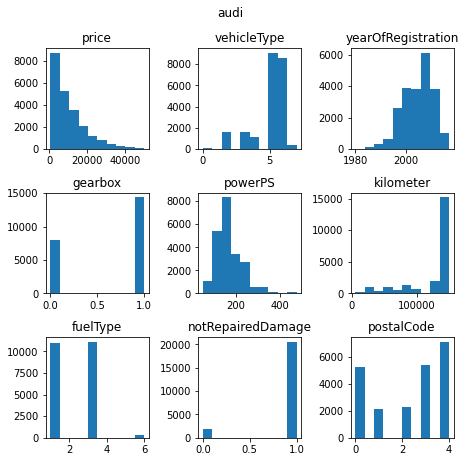

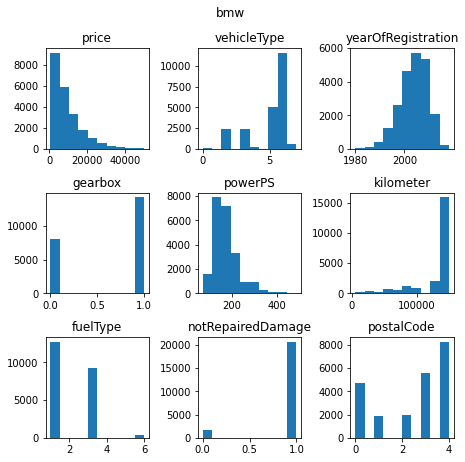

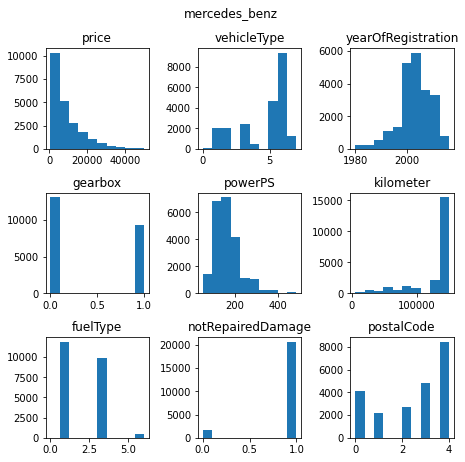

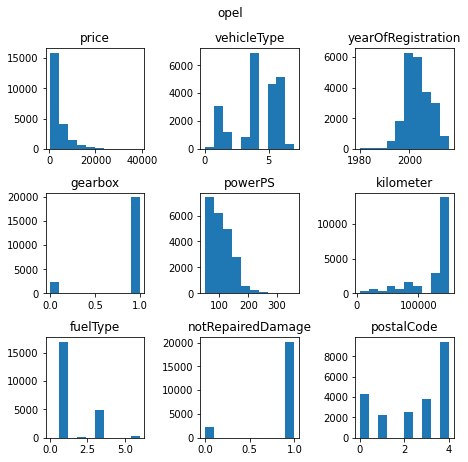

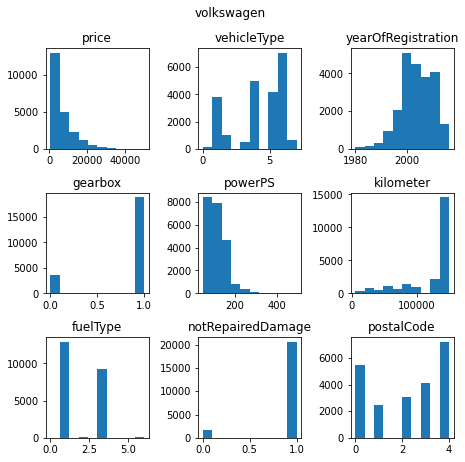

In [35]:
for brand in brands:
    df[df['brand']==brand][X.columns].hist(figsize=(6.5,6.5), grid=False)
    plt.suptitle(brand)
    plt.tight_layout()

In [36]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 4, 4, 4])

# Split dataset with train_test_split

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify=y)

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify=y_train)

In [39]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (67056, 9)
X_val shape: (22352, 9)
X_test shape: (22352, 9)
y_train shape: (67056,)
y_val shape: (22352,)
y_test shape: (22352,)


### Variance Threshold

In [40]:
from sklearn.feature_selection import VarianceThreshold

In [41]:
X_train.shape

(67056, 9)

In [42]:
vt = VarianceThreshold(threshold = 0.05)

vt.fit_transform(X_train).shape

(67056, 9)

In [43]:
vt = VarianceThreshold(threshold = 0.5)

vt_2 = vt.fit_transform(X_train)

In [44]:
vt_2.shape

(67056, 7)

### Backward Feature Elimination

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 5)
backward_sfs = SequentialFeatureSelector(model,
                                        k_features = 'best',
                                        forward = False,
                                        cv = 2, 
                                        verbose = 1, 
                                        n_jobs = -1)

backward_sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   17.7s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   17.9s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:   13.3s remaining:   22.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   15.1s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   15.3s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   12.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.7s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out 

SequentialFeatureSelector(cv=2, estimator=RandomForestClassifier(max_depth=5),
                          forward=False, k_features=(1, 9), n_jobs=-1,
                          scoring='accuracy', verbose=1)